In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
sns.set()


In [8]:
dick = pd.read_pickle('country_data.pkl')
world_df = pd.read_pickle('global_data.pkl')

swe = dick['Sweden']
swe

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-01-24,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2020-01-25,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-26,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-27,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
2020-01-28,0,NaN,0.0,0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-03-24,2286,1.117302,240.0,36,1.440000,11.0,1.574803,63.500000,1.288819
2020-03-25,2526,1.104987,240.0,62,1.722222,26.0,2.454473,40.741935,1.558591
2020-03-26,2840,1.124307,314.0,77,1.241935,15.0,2.711268,36.883117,1.104623
2020-03-27,3069,1.080634,229.0,105,1.363636,28.0,3.421310,29.228571,1.261886


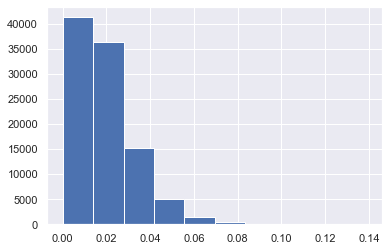

In [9]:
M_mu_s = pm.rbeta(alpha=2,beta=100,size=100000)
_ = plt.hist(M_mu_s)

0.988450983697662

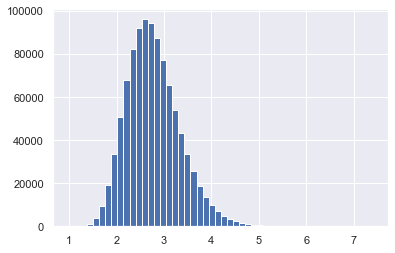

In [10]:
F_mu_s = pm.rlognormal(1,1/0.2**2, size=1000000)
_ = plt.hist(F_mu_s,bins=50)

F_mu_s.min()

++++++++ US ++++++++++

            confirmed    factor    inc  deceased  dead_factor  dead_inc  \
2020-03-08        518  1.288557  116.0        21     1.235294       4.0   
2020-03-10        959  1.644940  376.0        28     1.272727       6.0   
2020-03-11       1281  1.335766  322.0        36     1.285714       8.0   
2020-03-12       1663  1.298205  382.0        40     1.111111       4.0   
2020-03-13       2179  1.310283  516.0        47     1.175000       7.0   

            pct_dead  conf_over_dead  dead_conf_ratio  
2020-03-08  4.054054       24.666667         0.958665  
2020-03-10  2.919708       34.250000         0.773723  
2020-03-11  2.810304       35.583333         0.962529  
2020-03-12  2.405292       41.575000         0.855883  
2020-03-13  2.156953       46.361702         0.896753  

 [-----------------100%-----------------] 1000000 of 1000000 complete in 1359.6 sec[0.00288835 0.0046792 ] [2.83737776 4.54202908]

        M_alpha_post    M_beta_post      F_mu_post   F_s

 [-----------------100%-----------------] 1000000 of 1000000 complete in 1169.8 sec[0.01407524 0.02312342] [2.76110533 4.4957615 ]

        M_alpha_post    M_beta_post      F_mu_post   F_sigma_post  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       15.409217     669.177269       1.469729       0.201247   
std         8.125066     234.121287       0.252339       0.057605   
min         1.000898       4.047641       1.100008       0.100001   
25%         9.357675     503.533629       1.249613       0.151511   
50%        14.233576     708.695341       1.433835       0.201959   
75%        20.220094     867.874591       1.667859       0.251005   
max        60.814196     999.992823       1.999997       0.300000   

              M_post         F_post  gen_dead_post  
count  250000.000000  250000.000000  250000.000000  
mean        0.020986       4.353926      14.204220  
std         0.006805       1.475362       0.184276  
min         0.007283       1.75760

 [-----------------100%-----------------] 1000000 of 1000000 complete in 1166.8 sec[0.00385135 0.00651674] [2.79635948 4.5759882 ]

        M_alpha_post    M_beta_post      F_mu_post   F_sigma_post  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        5.138151     675.608537       1.484315       0.200228   
std         2.812257     228.242740       0.255446       0.057695   
min         1.000142       1.299619       1.100002       0.100001   
25%         3.012088     514.422648       1.260582       0.150465   
50%         4.626931     713.638376       1.453043       0.200017   
75%         6.720572     868.128879       1.690876       0.250482   
max        28.856608     999.993040       1.999999       0.300000   

              M_post         F_post  gen_dead_post  
count  250000.000000  250000.000000  250000.000000  
mean        0.005994       4.457815       4.050439  
std         0.002071       1.510597       0.341721  
min         0.001643       1.09239

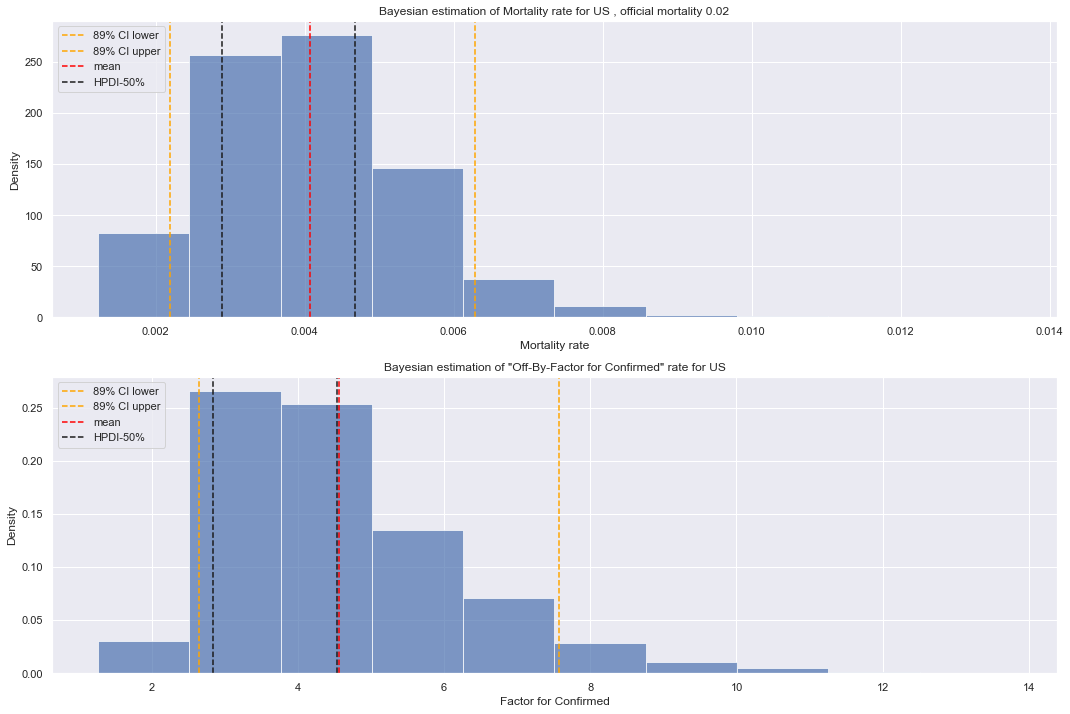

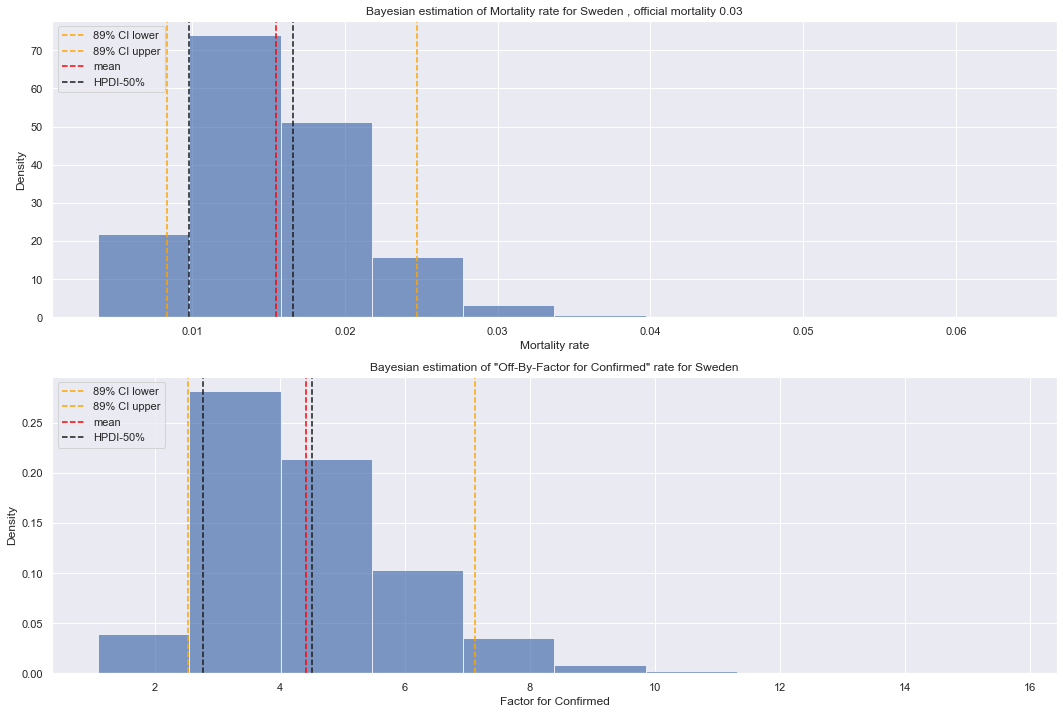

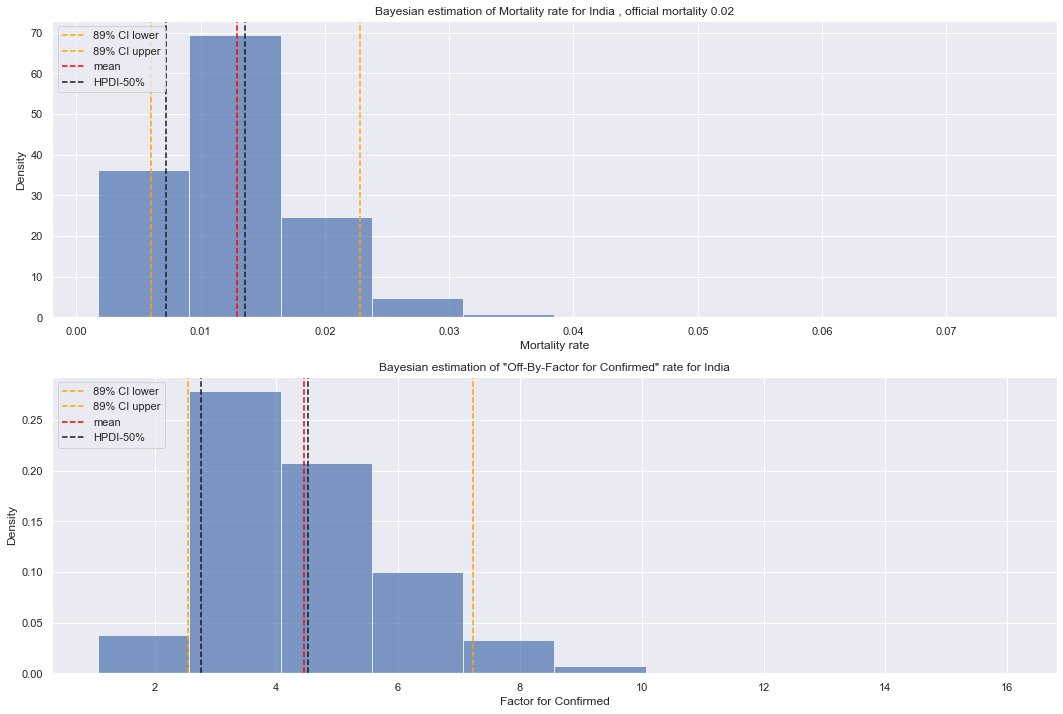

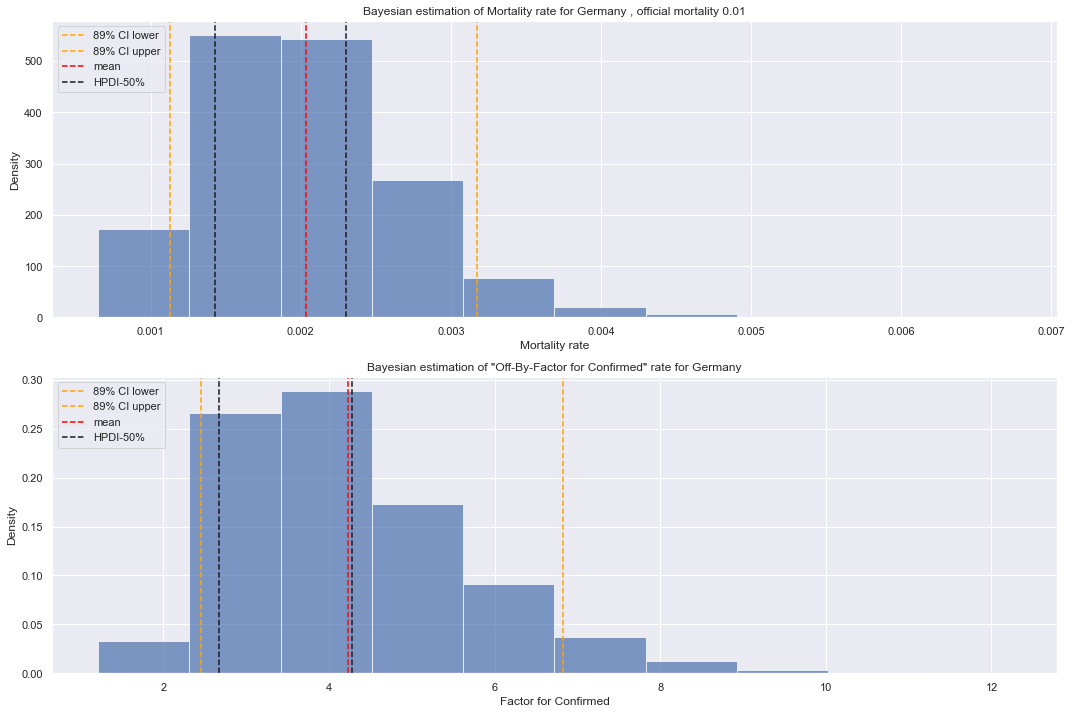

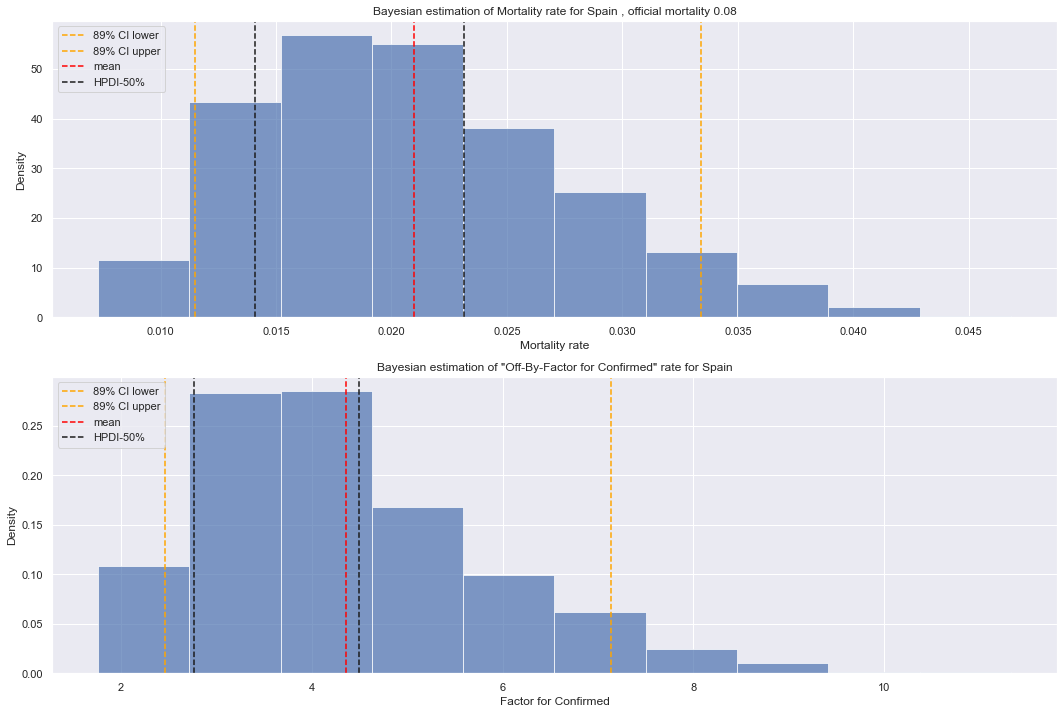

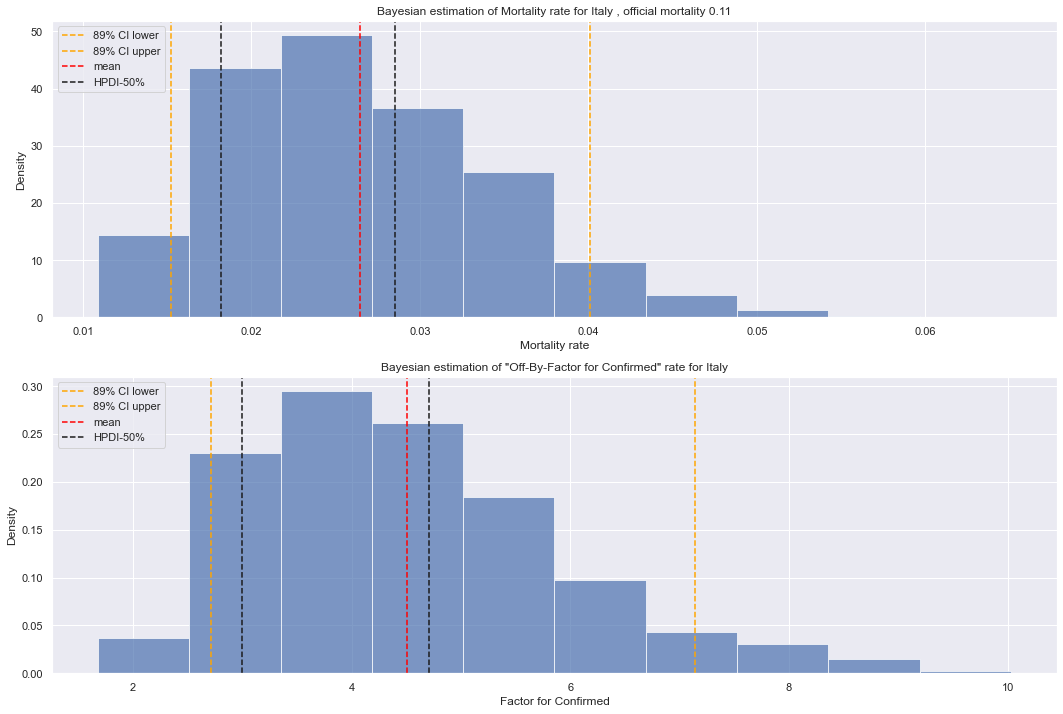

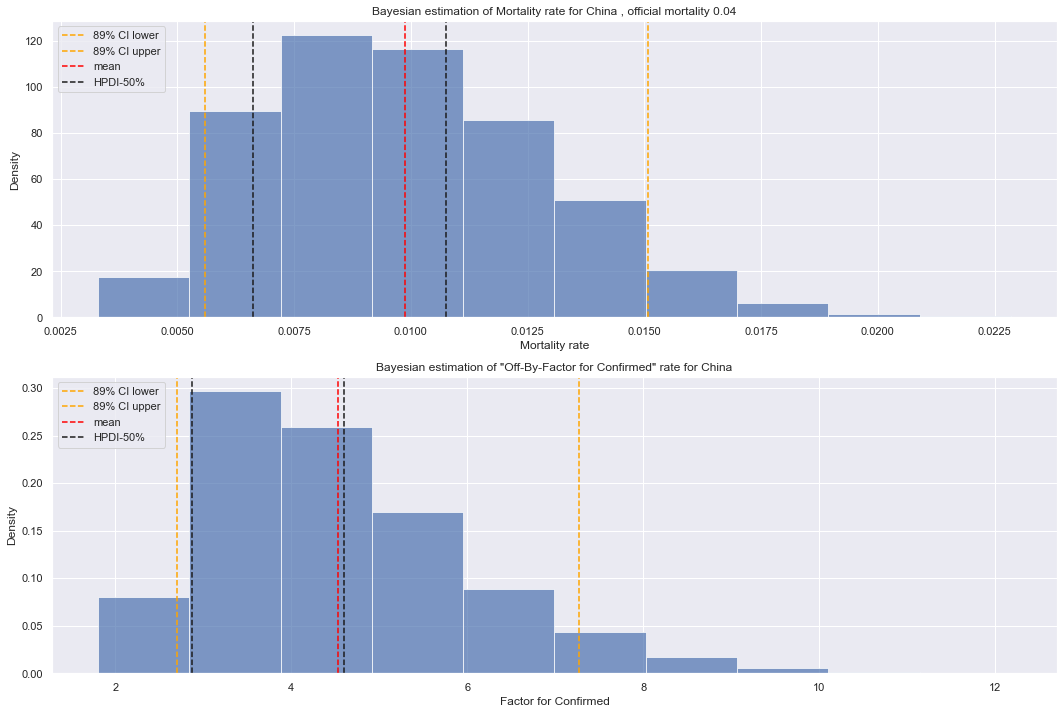

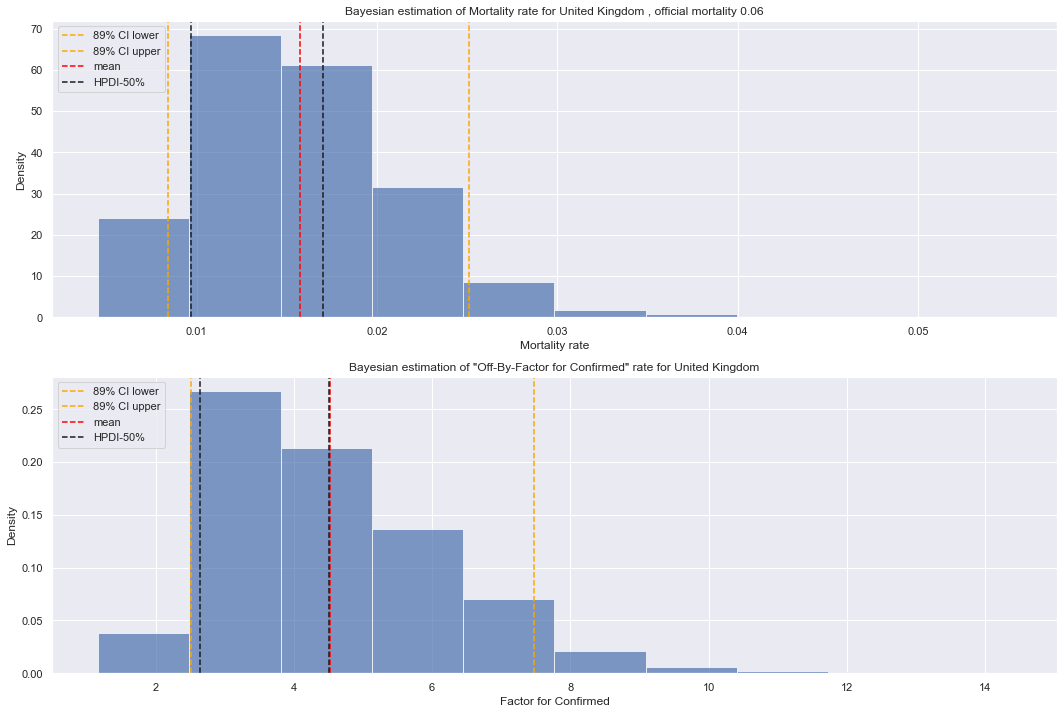

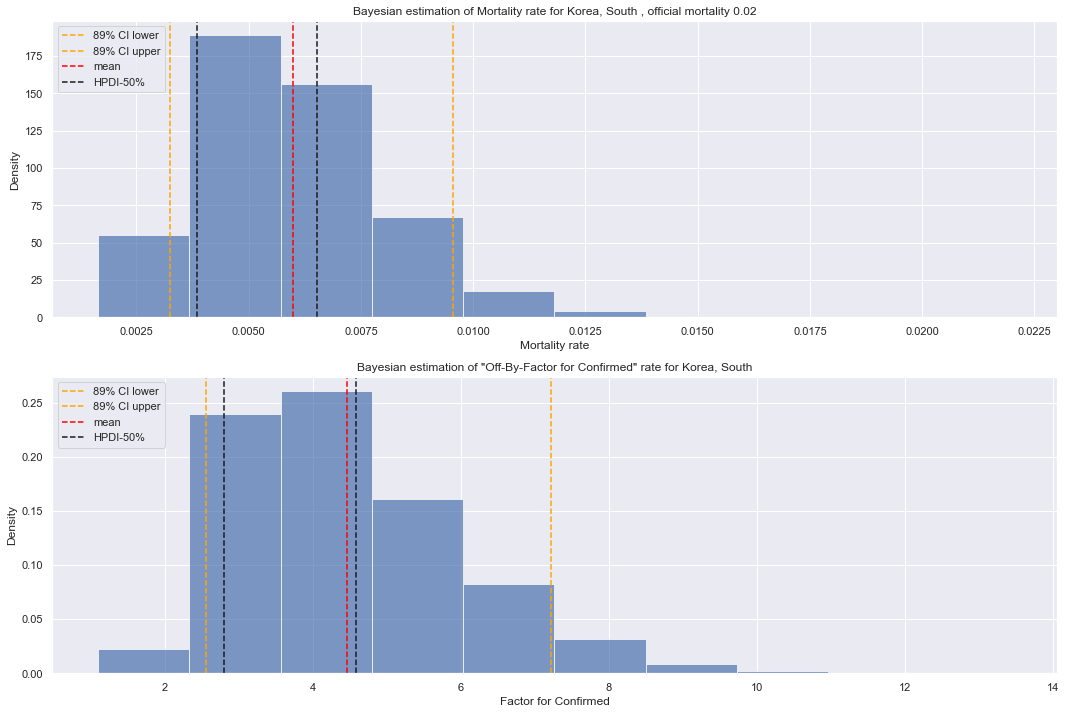

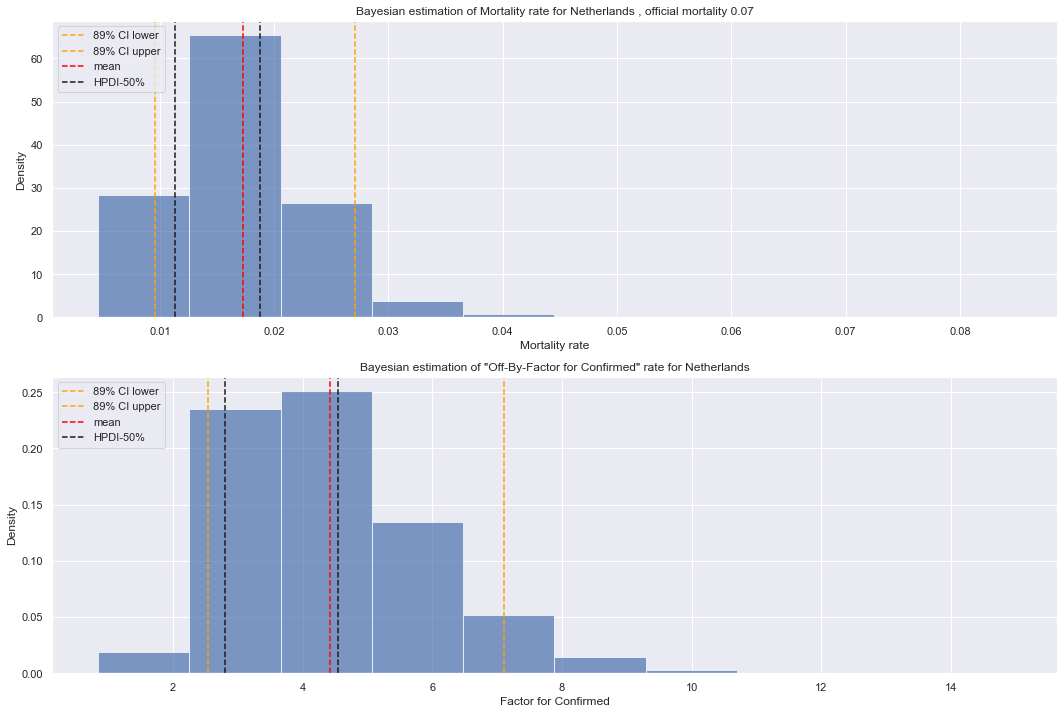

In [11]:


def process_country(country,C,D):
    df = dick[country]
    
    mask = df['confirmed'] > 500
    df = df[mask]
    mask = df['deceased'] > 5
    df = df[mask]
    mask = df['dead_inc'] > 1 # or it crashes when doing inc  & dead_inc
    df = df[mask]
    
    print ('++++++++ {} ++++++++++'.format(country))
    print ()
    print (df.head())
    print()
    
    if df.size < 1 :
        print ('Not enough data - DataFrame empty! ')
    else:
        confirmed_mean = df['confirmed'].mean()
        confirmed_std = df['confirmed'].std()
        dead_mean = df['deceased'].mean()
        dead_std = df['deceased'].std()

        #confirmed_s = (df['confirmed'] - confirmed_mean) / confirmed_std
        #dead_s = (df['deceased'] - dead_mean) / dead_std

        confirmed_s = df[C]
        dead_s = df[D]

        #plt.plot(confirmed_s,dead_s,'x--')

        #M_mu = pm.Uniform('M_mu',lower=0.1,upper=1)

        F_mu = pm.Uniform('F_mu',lower=1.1,upper=2)
        F_sigma = pm.Uniform('F_sigma',lower=0.1,upper=0.3)

        M_alpha = pm.Uniform('M_alpha',lower=1,upper=1000)
        M_beta = pm.Uniform ('M_beta',lower=1,upper=1000)


        M = pm.Beta('M',alpha=M_alpha,beta=M_beta)
        F = pm.Lognormal('F',mu=F_mu, tau=1 / F_sigma ** 2) #0.6 0.2


        @pm.deterministic()
        def gen_dead(confirmed_s=confirmed_s,F=F,M=M):
            return confirmed_s * F * M

        obs = pm.Poisson('obs',mu=gen_dead,observed=True,value=dead_s)

        model = pm.Model([M_alpha,M_beta,F_mu,F_sigma,M,F,gen_dead,obs])
        map_ = pm.MAP(model)
        
        try:
            map_.fit()
        except:
            print ('couldnt fit {}'.format(country))

        mcmc = pm.MCMC(model)
        mcmc.sample(1000000,500000,2)

        M_alpha_post = mcmc.trace('M_alpha')[:]
        M_beta_post = mcmc.trace('M_beta')[:]
        F_mu_post = mcmc.trace('F_mu')[:]
        F_sigma_post = mcmc.trace('F_sigma')[:]
        M_post = mcmc.trace('M')[:]
        F_post = mcmc.trace('F')[:]
        gen_dead_post = mcmc.trace('gen_dead')[:,0]

        result = pd.DataFrame({'M_alpha_post' : M_alpha_post,
                                   'M_beta_post' : M_beta_post,
                                   'F_mu_post' : F_mu_post,
                                   'F_sigma_post' : F_sigma_post,
                                   'M_post' : M_post,
                                   'F_post' : F_post,
                              'gen_dead_post' : gen_dead_post})
        

        return result
    return None

def plot(country_name,result,official_mortality):
    
    M_low,M_high = np.percentile(result.M_post,[5.5,94.5])
    F_low,F_high = np.percentile(result.F_post,[5.5,94.5])
    
    hpdi_M = pm.utils.hpd(result.M_post, alpha=0.50)
    hpdi_F = pm.utils.hpd(result.F_post,alpha=0.50)
    
    print (hpdi_M,hpdi_F)
    
    plt.figure(figsize=(18,12))
    plt.subplot(211)
    plt.title('Bayesian estimation of Mortality rate for {} , official mortality {:.2f}'.format(
        country_name,official_mortality / 100))
    plt.xlabel('Mortality rate')
    plt.ylabel('Density')
    plt.axvline(M_low,color='orange',ls='dashed',label='89% CI lower')
    plt.axvline(M_high,color='orange',ls='dashed',label='89% CI upper')
    plt.axvline(result.M_post.mean(),color='red',ls='dashed',label='mean')
    plt.axvline(hpdi_M[0],color='k',label='HPDI-50%',ls='dashed')
    plt.axvline(hpdi_M[1],color='k',ls='dashed')
    
    hist = plt.hist(result.M_post,density=True,bins=10,alpha=0.7,color='b')
    #plt.fill_between(x=hpdi_M,y1=0,y2=max(hist[0]),color='r',alpha=0.7,label='HPDI-50%')
    plt.legend(loc='upper left')


    plt.subplot(212)
    plt.title('Bayesian estimation of "Off-By-Factor for Confirmed" rate for {}'.format(country_name))
    plt.xlabel('Factor for Confirmed')
    plt.ylabel('Density')
    plt.axvline(F_low,color='orange',ls='dashed',label='89% CI lower')
    plt.axvline(F_high,color='orange',ls='dashed',label='89% CI upper')
    plt.axvline(result.F_post.mean(),color='red',ls='dashed',label='mean')
    plt.axvline(hpdi_F[0],color='k',label='HPDI-50%',ls='dashed')
    plt.axvline(hpdi_F[1],color='k',ls='dashed')
    
    hist = plt.hist(result.F_post,density=True,bins=10,alpha=0.7,color='b')
    #plt.fill_between(x=hpdi_F,y1=0,y2=max(hist[0]),color='r',alpha=0.7,label='HPDI-50%')

    plt.legend(loc='upper left')

    plt.savefig('Bayesian_estimate_mortality_and_factor_{}_.jpg'.format(country_name),format='jpg')

countries = ['US','Sweden','India','Germany','Spain','Italy','China','United Kingdom','Korea, South','Netherlands']

for c in countries:
    
    result = process_country(c,'inc','dead_inc')
    if not (result is None) :
        official_mortality = dick[c].iloc[-1,6]
        plot(c,result,official_mortality)
        print ()
        print (result.describe())
       

 [-----------------100%-----------------] 1000000 of 1000000 complete in 1175.7 sec

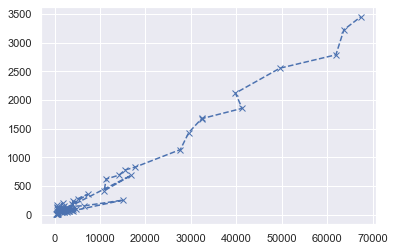

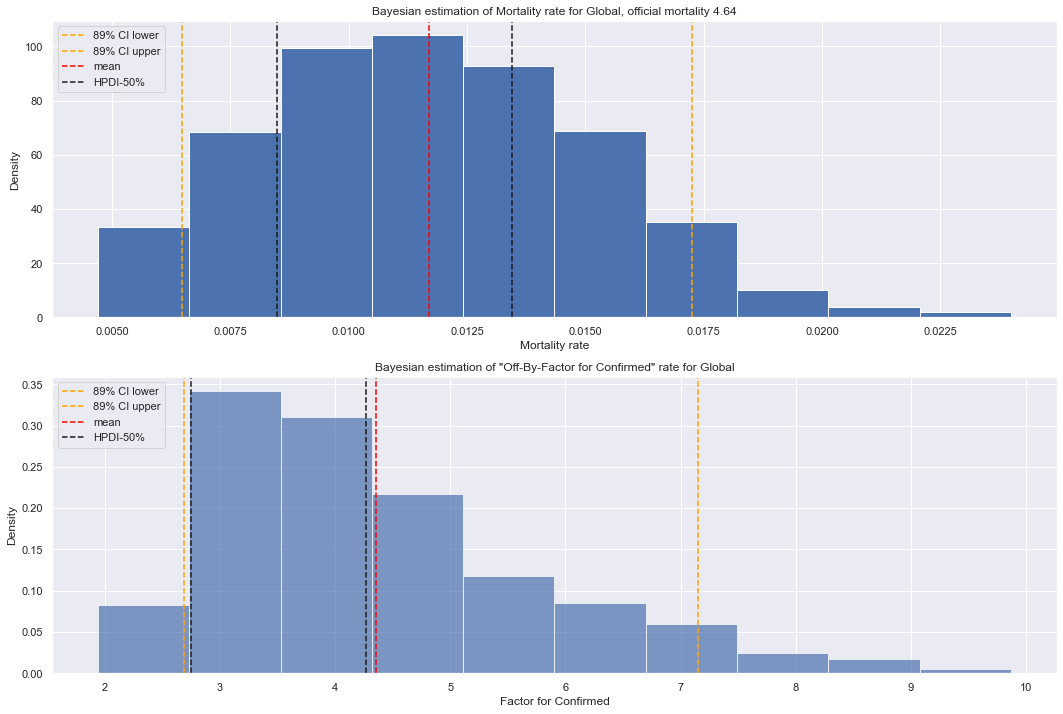

In [12]:
def process_world(df,C,D):
    
    mask = df['confirmed'] > 1000
    df = df[mask]
    mask = df['dead'] > 5
    df = df[mask]
    
    confirmed_mean = df['confirmed'].mean()
    confirmed_std = df['confirmed'].std()
    dead_mean = df['dead'].mean()
    dead_std = df['dead'].std()
    
    #confirmed_s = (df['confirmed'] - confirmed_mean) / confirmed_std
    #dead_s = (df['deceased'] - dead_mean) / dead_std
    
    confirmed_s = df[C]
    dead_s = df[D]
    
    plt.plot(confirmed_s,dead_s,'x--')
    
    #F_mu = pm.Uniform('F_mu',lower=1,upper=1.2)
    #F_sigma = pm.Uniform('F_sigma',lower=0.19,upper=0.21)
    
    F_mu = pm.Uniform('F_mu',lower=1.1,upper=2)
    F_sigma = pm.Uniform('F_sigma',lower=0.1,upper=0.3)
    
    M_alpha = pm.Uniform('M_alpha',lower=1,upper=1000)
    M_beta = pm.Uniform ('M_beta',lower=1,upper=1000)
    
    
    M = pm.Beta('M',alpha=M_alpha,beta=M_beta)
    F = pm.Lognormal('F',mu=F_mu, tau=1 / F_sigma ** 2) #0.6 0.2
    
    
    @pm.deterministic()
    def gen_dead(confirmed_s=confirmed_s,F=F,M=M):
        return confirmed_s * F * M
    
    obs = pm.Poisson('obs',mu=gen_dead,observed=True,value=dead_s)
    
    model = pm.Model([M_alpha,M_beta,F_mu,F_sigma,M,F,gen_dead,obs])
    map_ = pm.MAP(model)
    map_.fit()
    mcmc = pm.MCMC(model)
    mcmc.sample(1000000,500000,2)
    
    M_alpha_post = mcmc.trace('M_alpha')[:]
    M_beta_post = mcmc.trace('M_beta')[:]
    F_mu_post = mcmc.trace('F_mu')[:]
    F_sigma_post = mcmc.trace('F_sigma')[:]
    M_post = mcmc.trace('M')[:]
    F_post = mcmc.trace('F')[:]
    gen_dead_post = mcmc.trace('gen_dead')[:,0]
    
    result = pd.DataFrame({'M_alpha_post' : M_alpha_post,
                          'M_beta_post' : M_beta_post,
                          'F_mu_post' : F_mu_post,
                          'F_sigma_post' : F_sigma_post,
                          'M_post' : M_post,
                          'F_post' : F_post,
                          'gen_dead_post' : gen_dead_post})
    
    return result

def plot_world(result,title,official_mortality):
    
    M_low,M_high = np.percentile(result.M_post,[5.5,94.5])
    F_low,F_high = np.percentile(result.F_post,[5.5,94.5])
    
    hpdi_M = pm.utils.hpd(result.M_post, alpha=0.50)
    hpdi_F = pm.utils.hpd(result.F_post,alpha=0.50)
    
    
    plt.figure(figsize=(18,12))
    plt.subplot(211)
    plt.title('Bayesian estimation of Mortality rate for {}, official mortality {:.2f}'.format(title,official_mortality))
    plt.xlabel('Mortality rate')
    plt.ylabel('Density')
    plt.axvline(M_low,color='orange',ls='dashed',label='89% CI lower')
    plt.axvline(M_high,color='orange',ls='dashed',label='89% CI upper')
    plt.axvline(result.M_post.mean(),color='red',ls='dashed',label='mean')
    
    plt.axvline(hpdi_M[0],color='k',label='HPDI-50%',ls='dashed')
    plt.axvline(hpdi_M[1],color='k',ls='dashed')
    
    hist = plt.hist(result.M_post,density=True,bins=10,alpha=0.7,color='b')

    plt.legend(loc='upper left')
    plt.hist(result.M_post,density=True,bins=10)

    plt.subplot(212)
    plt.title('Bayesian estimation of "Off-By-Factor for Confirmed" rate for {}'.format(title))
    plt.xlabel('Factor for Confirmed')
    plt.ylabel('Density')
    plt.axvline(F_low,color='orange',ls='dashed',label='89% CI lower')
    plt.axvline(F_high,color='orange',ls='dashed',label='89% CI upper')
    plt.axvline(result.F_post.mean(),color='red',ls='dashed',label='mean')
    
    plt.axvline(hpdi_F[0],color='k',label='HPDI-50%',ls='dashed')
    plt.axvline(hpdi_F[1],color='k',ls='dashed')
    
    hist = plt.hist(result.F_post,density=True,bins=10,alpha=0.7,color='b')

    plt.legend(loc='upper left')

    plt.savefig('Bayesian_estimate_mortality_and_factor_{}.jpg'.format(title),format='jpg')

world_df = pd.read_pickle('global_data.pkl')

result_world = process_world(world_df,'inc','dead_inc')
official_mortality = world_df.iloc[-1,6]
plot_world(result_world,'Global',official_mortality)
